In [71]:
import numpy as np 
import pandas as pd
import math 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

In [72]:
df = pd.read_csv( r'C:\Users\Anusree\Downloads\framingham.csv')
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [73]:
df.shape

(4238, 16)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [75]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [76]:
df['cigsPerDay'][df['cigsPerDay'].isnull() == True ] = round(np.mean(df['cigsPerDay']) , 0)
df['BPMeds'][df['BPMeds'].isnull() == True] = 1 
df['totChol'][df['totChol'].isnull() == True ] = np.mean(df['totChol'])
df['BMI'][df['BMI'].isnull() == True ] = np.mean(df['BMI'])
df['heartRate'][df['heartRate'].isnull() == True ] = np.mean(df['heartRate'])
df['glucose'][df['glucose'].isnull() == True ] = np.mean(df['glucose'])
df['education'][df['education'].isnull() == True ] = round(np.mean(df['education']) , 0)

C:\Users\Anusree\AppData\Local\Temp\ipykernel_10200\3398150472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cigsPerDay'][df['cigsPerDay'].isnull() == True ] = round(np.mean(df['cigsPerDay']) , 0)
C:\Users\Anusree\AppData\Local\Temp\ipykernel_10200\3398150472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BPMeds'][df['BPMeds'].isnull() == True] = 1
C:\Users\Anusree\AppData\Local\Temp\ipykernel_10200\3398150472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [77]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [78]:
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4238.000000    4238.000000  4238.000000   
mean      0.429212    49.584946     1.979471       0.494101     9.003067   
std       0.495022     8.572160     1.007081       0.500024    11.879230   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4238.000000      4238.000000   4238.000000  4238.000000  4238.000000   
mean      0.041765         0.005899      0.310524     0.025720   236.721585   
std       0.200075         0.076587      0.462763     0.158316    44.326453   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   262.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4238.000000  4238.000000  4238.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.070953    12.025177    22.836603   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.080000    68.000000    72.000000   
50%     128.000000    82.000000    25.410000    75.000000    80.000000   
75%     144.000000    89.875000    28.037500    83.000000    85.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [80]:
'''creating feature name list for ease in futhure coding '''

contFeat = ['age' , 'cigsPerDay' , 'totChol', 'sysBP' ,'diaBP' , 'BMI' ,  'heartRate', 'glucose']
discreteFeat = ['male' , 'currentSmoker' , 'BPMeds' , 'prevalentStroke' , 'prevalentHyp' , 'diabetes']
discreteFeat_withy = ['male' , 'currentSmoker' , 'BPMeds' , 'prevalentStroke' , 'prevalentHyp' , 'diabetes' , 'TenYearCHD']

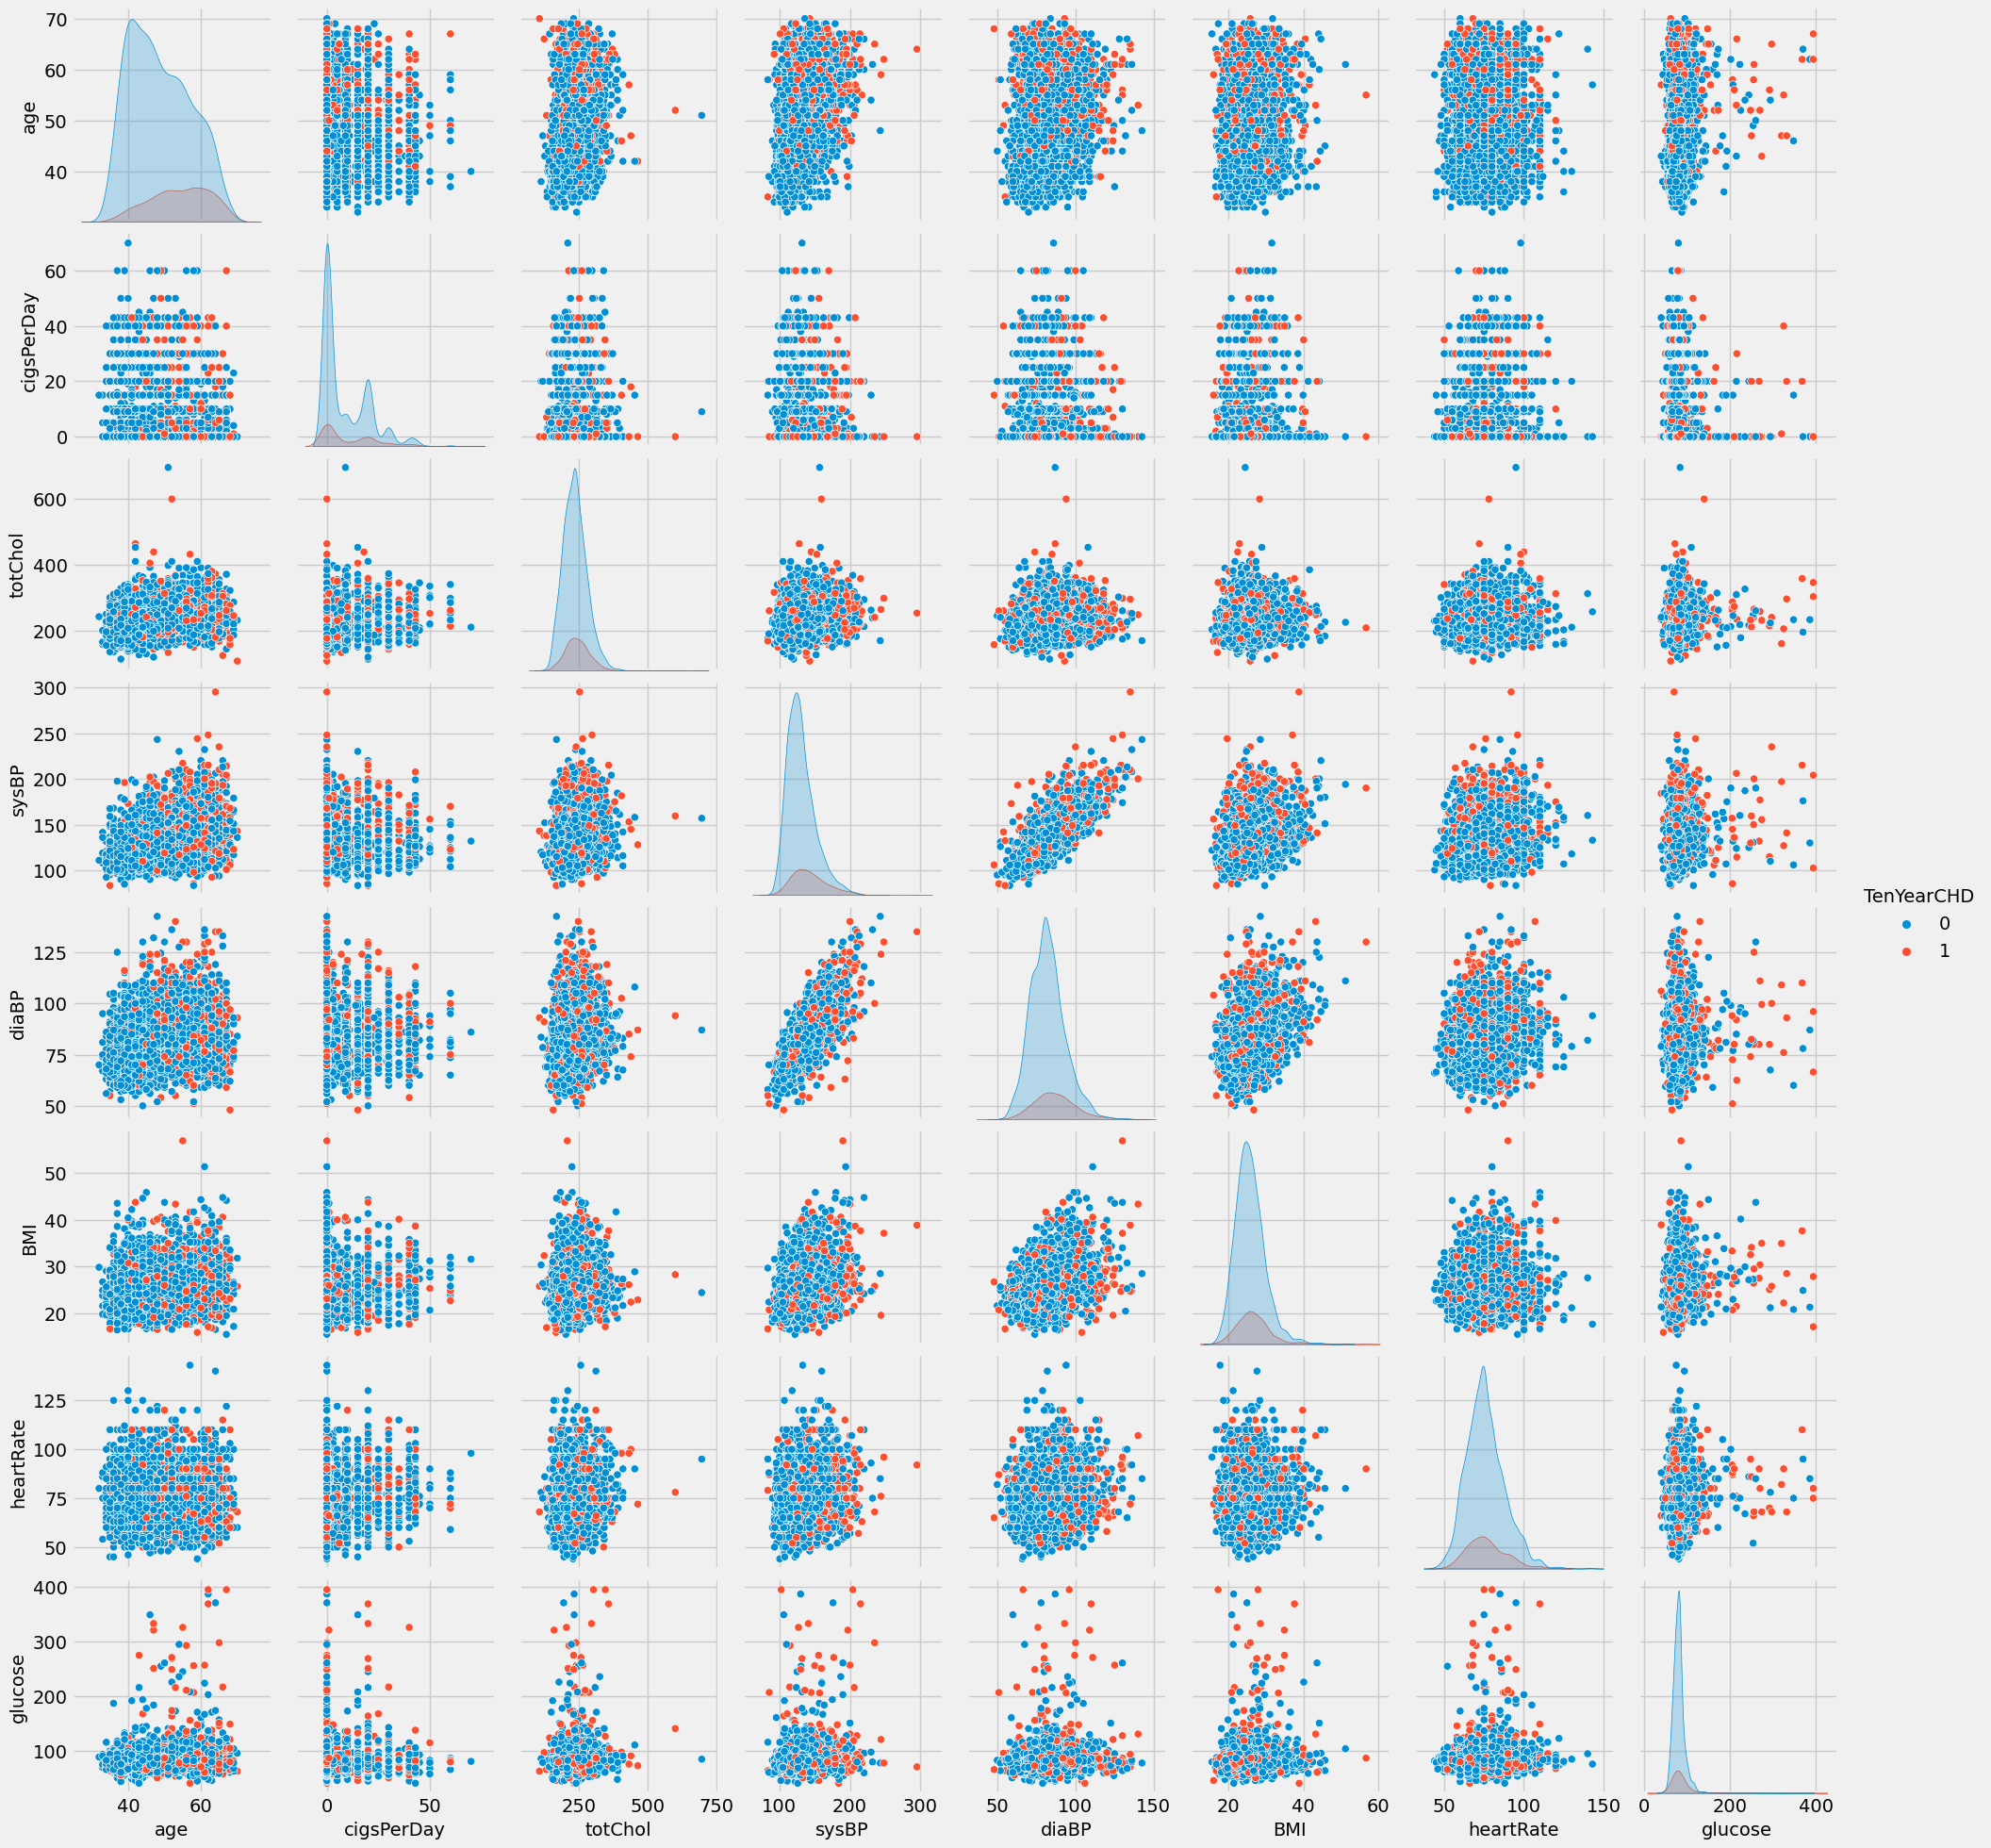

In [81]:
plt.style.use('fivethirtyeight')

sns.pairplot(df , hue = 'TenYearCHD',
             vars = ['age' , 'cigsPerDay' , 'totChol', 'sysBP' ,'diaBP' , 'BMI' ,  'heartRate', 'glucose'])
plt.show()

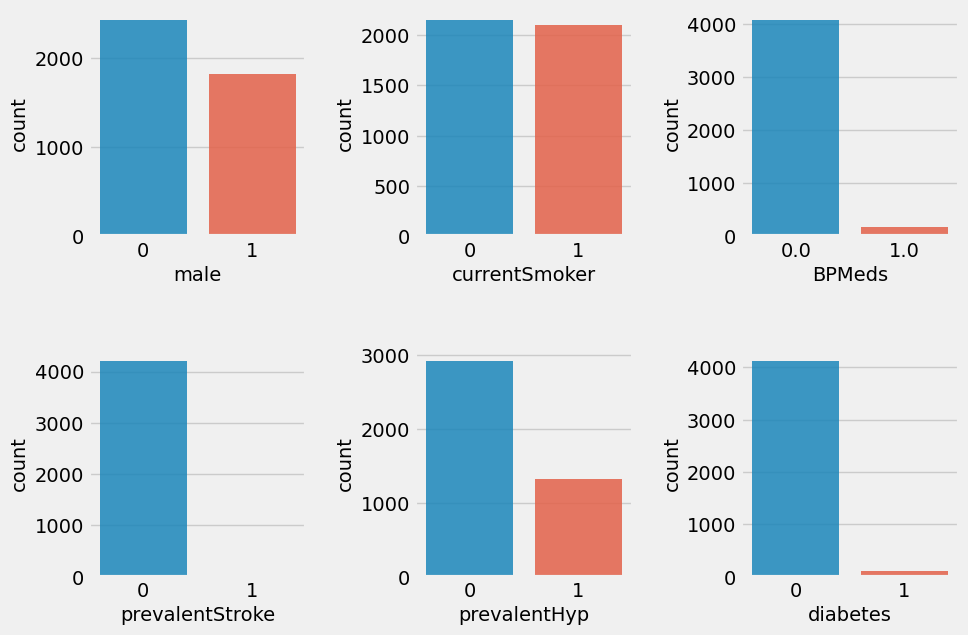

In [82]:
plt.figure(1 , figsize = (10 , 7))

n = 0
for f in discreteFeat:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.countplot(x = f , data = df , alpha = 0.85)

plt.show()

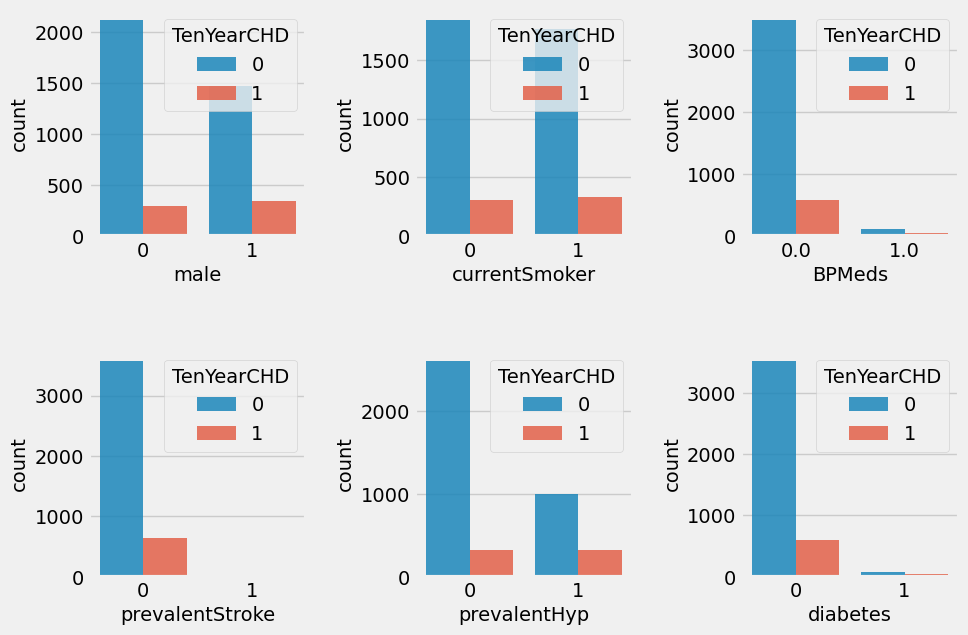

In [83]:
plt.figure(1 , figsize = (10 , 7))

n = 0
for f in discreteFeat:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.countplot(x = f , hue = 'TenYearCHD' , data = df , alpha = 0.85)

plt.show()

C:\Users\Anusree\AppData\Local\Temp\ipykernel_10200\1632240519.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[f] , bins = 40 , color = 'red')
C:\Users\Anusree\AppData\Local\Temp\ipykernel_10200\1632240519.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[f] , bins = 40 , color = 're

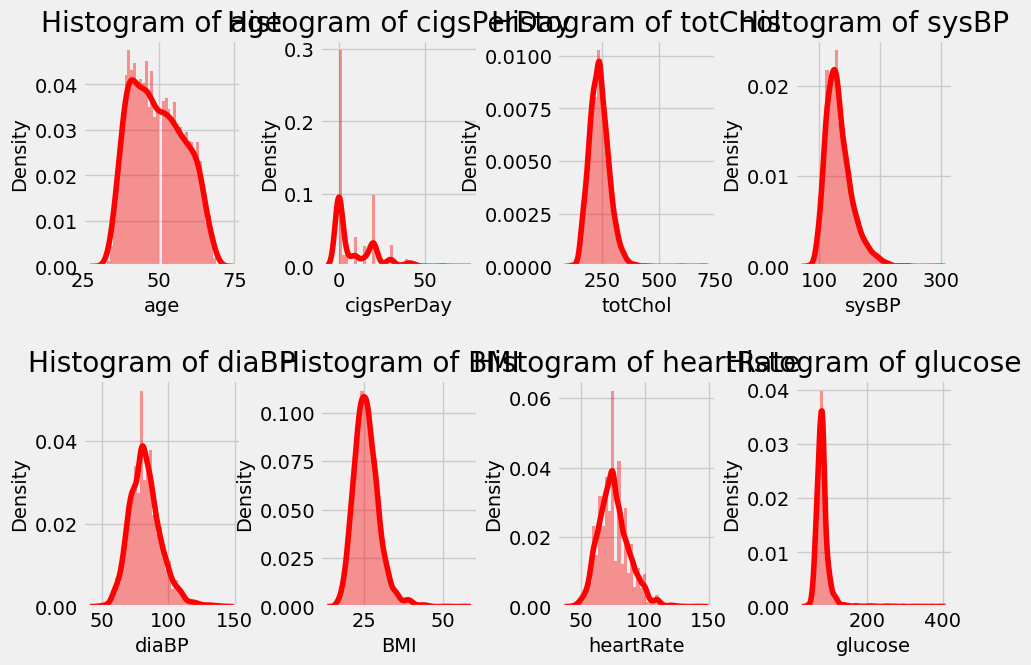

In [84]:
plt.figure(1 , figsize = (10 , 7))

n = 0
for f in contFeat:
    n += 1
    plt.subplot(2 , 4  , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[f] , bins = 40 , color = 'red')
    plt.title('Histogram of {}'.format(f))

plt.show()

C:\Users\Anusree\AppData\Local\Temp\ipykernel_10200\3939307395.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[f][df['TenYearCHD'] == 0] , bins = 50 , label = '0')
C:\Users\Anusree\AppData\Local\Temp\ipykernel_10200\3939307395.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[f][df['

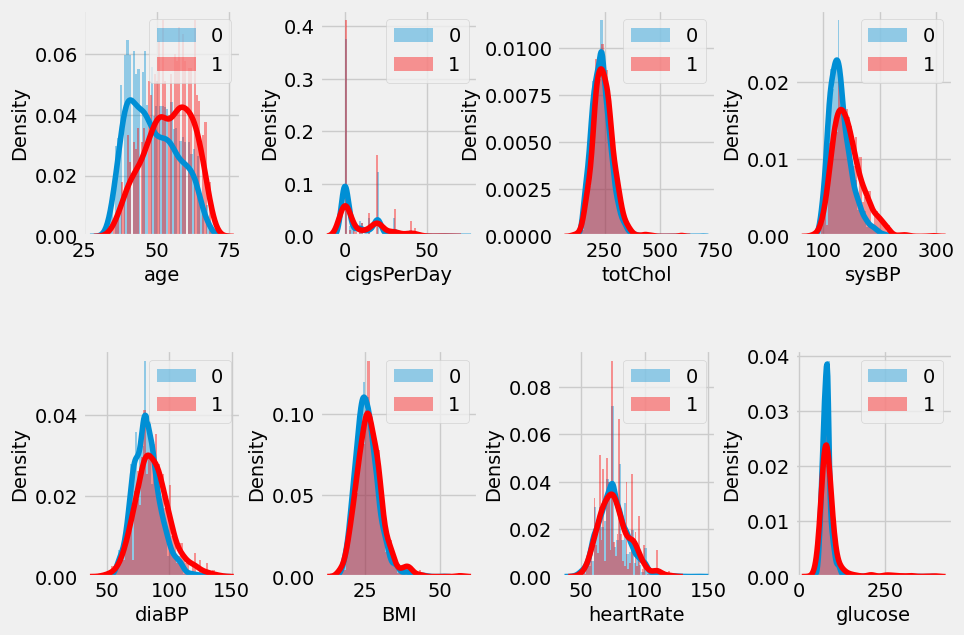

In [85]:
plt.figure(1 , figsize = (10 , 7))
n = 0
for f in contFeat:
    n += 1 
    plt.subplot(2 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[f][df['TenYearCHD'] == 0] , bins = 50 , label = '0')
    sns.distplot(df[f][df['TenYearCHD'] == 1] , bins = 50 , color = 'red' , label = '1')
    plt.legend()
    
plt.show()

In [86]:
def scatter_plot(x , y , hue , label1 , label2 , s1 = 50 , s2 = 100):

    plt.scatter(x = x , y = y , s = s1 , data = df[df[hue] == 0] , 
                label = label1 , alpha = 0.8 )

    plt.scatter(x = x , y = y , s = s2 , data = df[df[hue] == 1] , 
                label = label2 , color = 'red' , alpha = 0.5 )

    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()

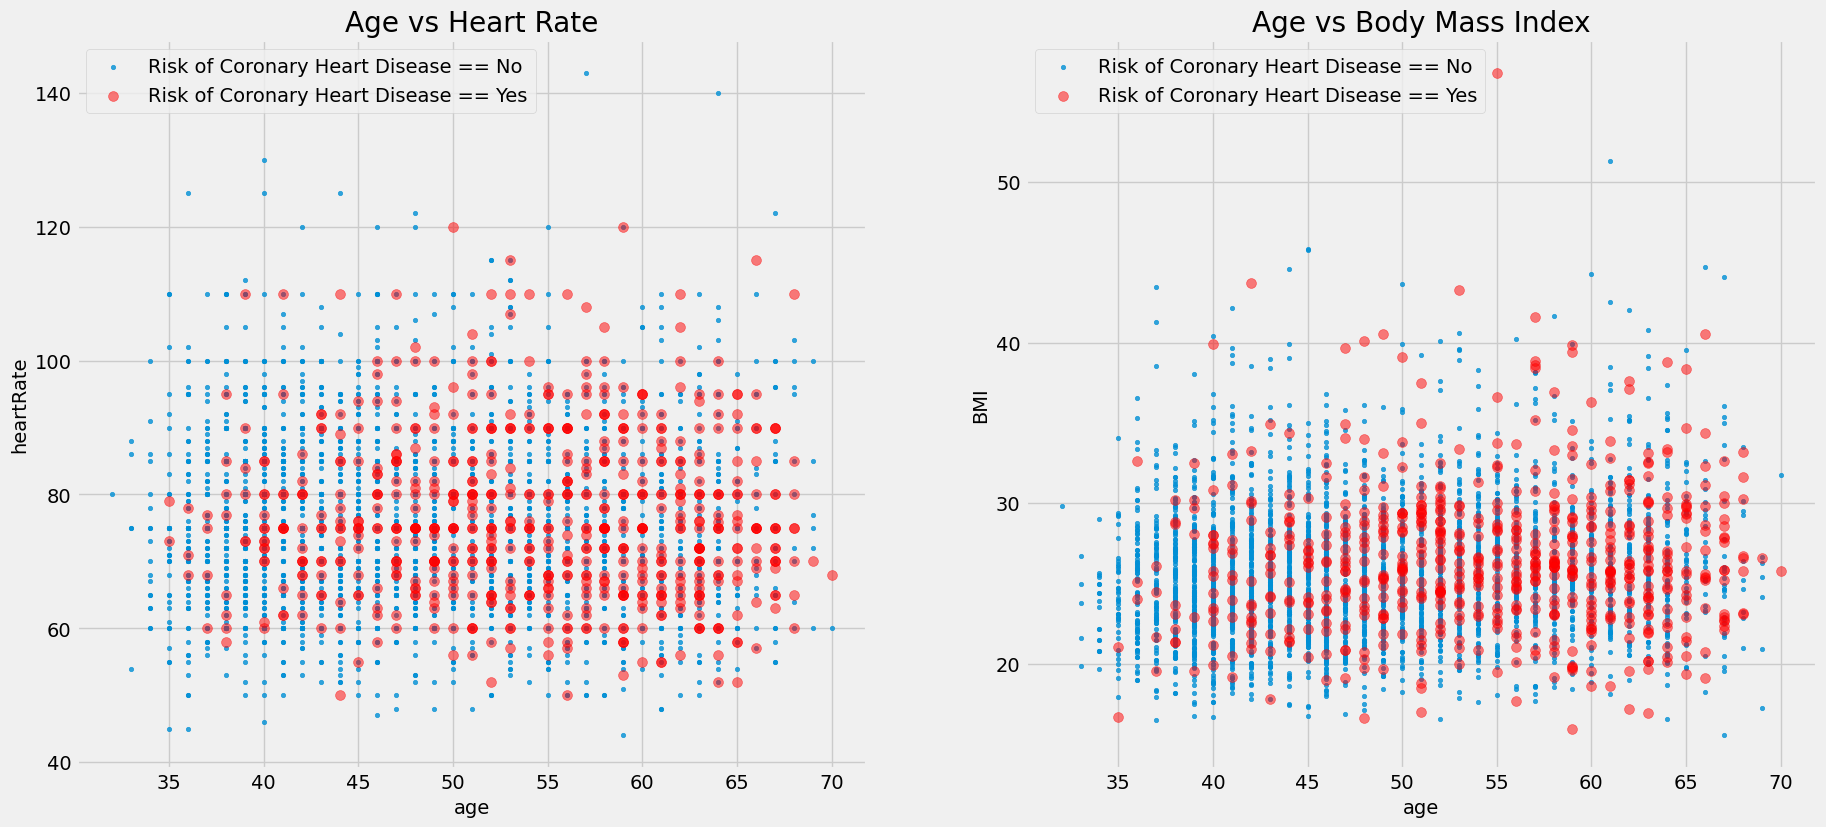

In [87]:
plt.figure(1 , figsize = (20 ,9))

plt.subplot(1 , 2 , 1)
scatter_plot(x = 'age' , y = 'heartRate' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Heart Rate')

plt.subplot(1 , 2 , 2)
scatter_plot(x = 'age' , y = 'BMI' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Body Mass Index')

plt.show()


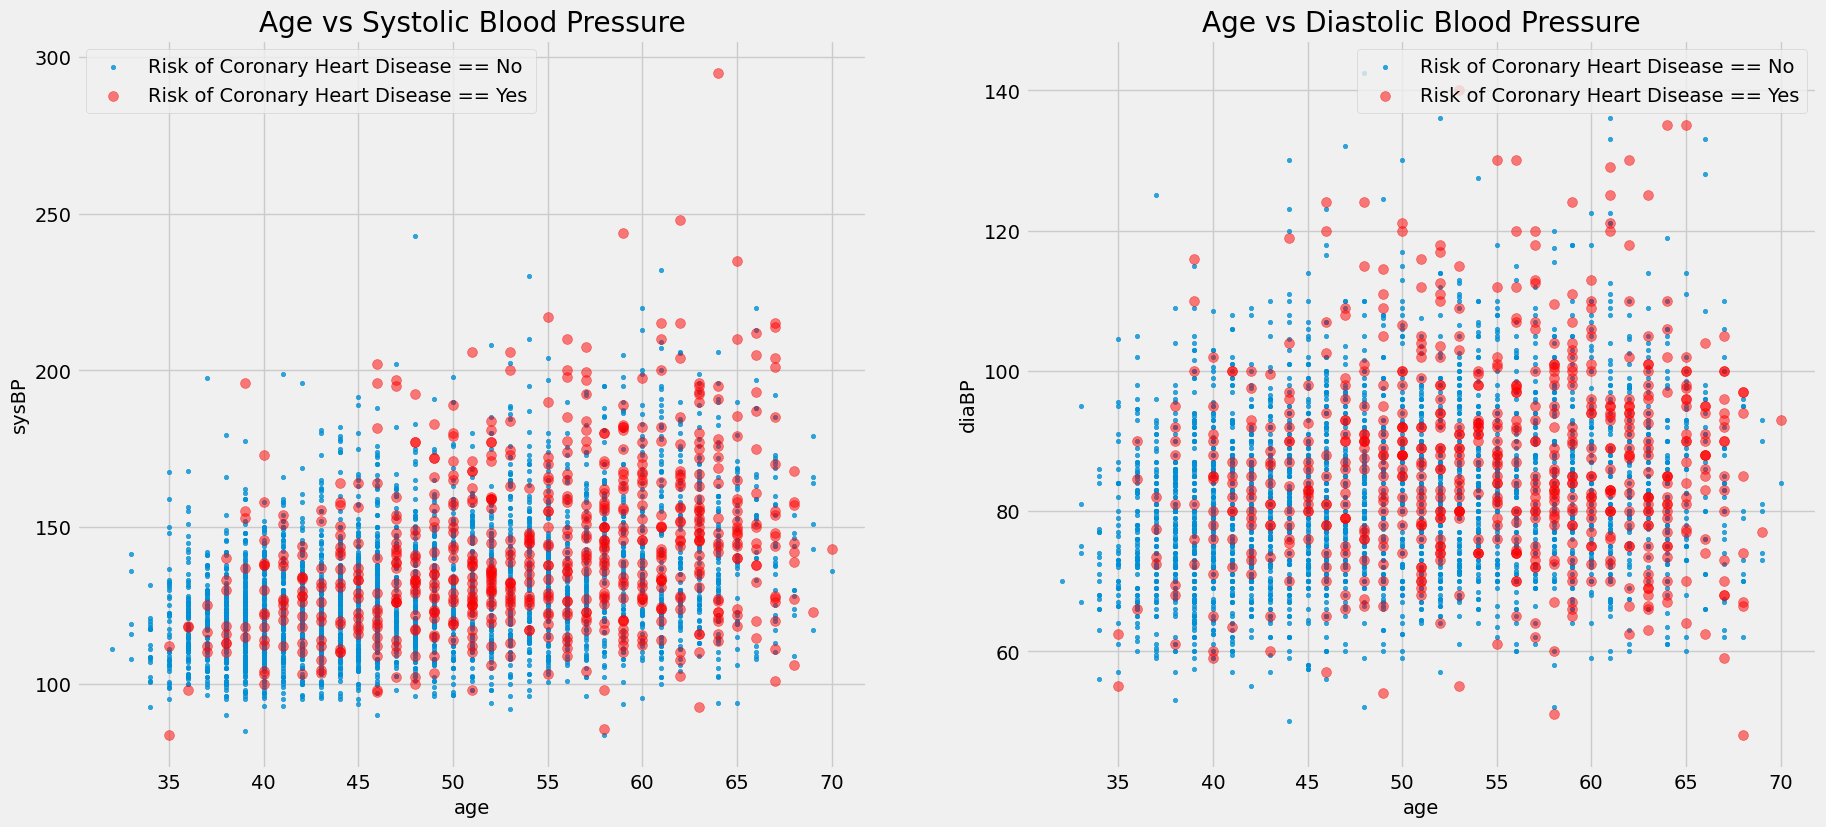

In [88]:
plt.figure(1 , figsize = (20 ,9))

plt.subplot(1 , 2 , 1)
scatter_plot(x = 'age' , y = 'sysBP' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Systolic Blood Pressure')

plt.subplot(1 , 2 , 2)
scatter_plot(x = 'age' , y = 'diaBP' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Diastolic Blood Pressure')


plt.show()

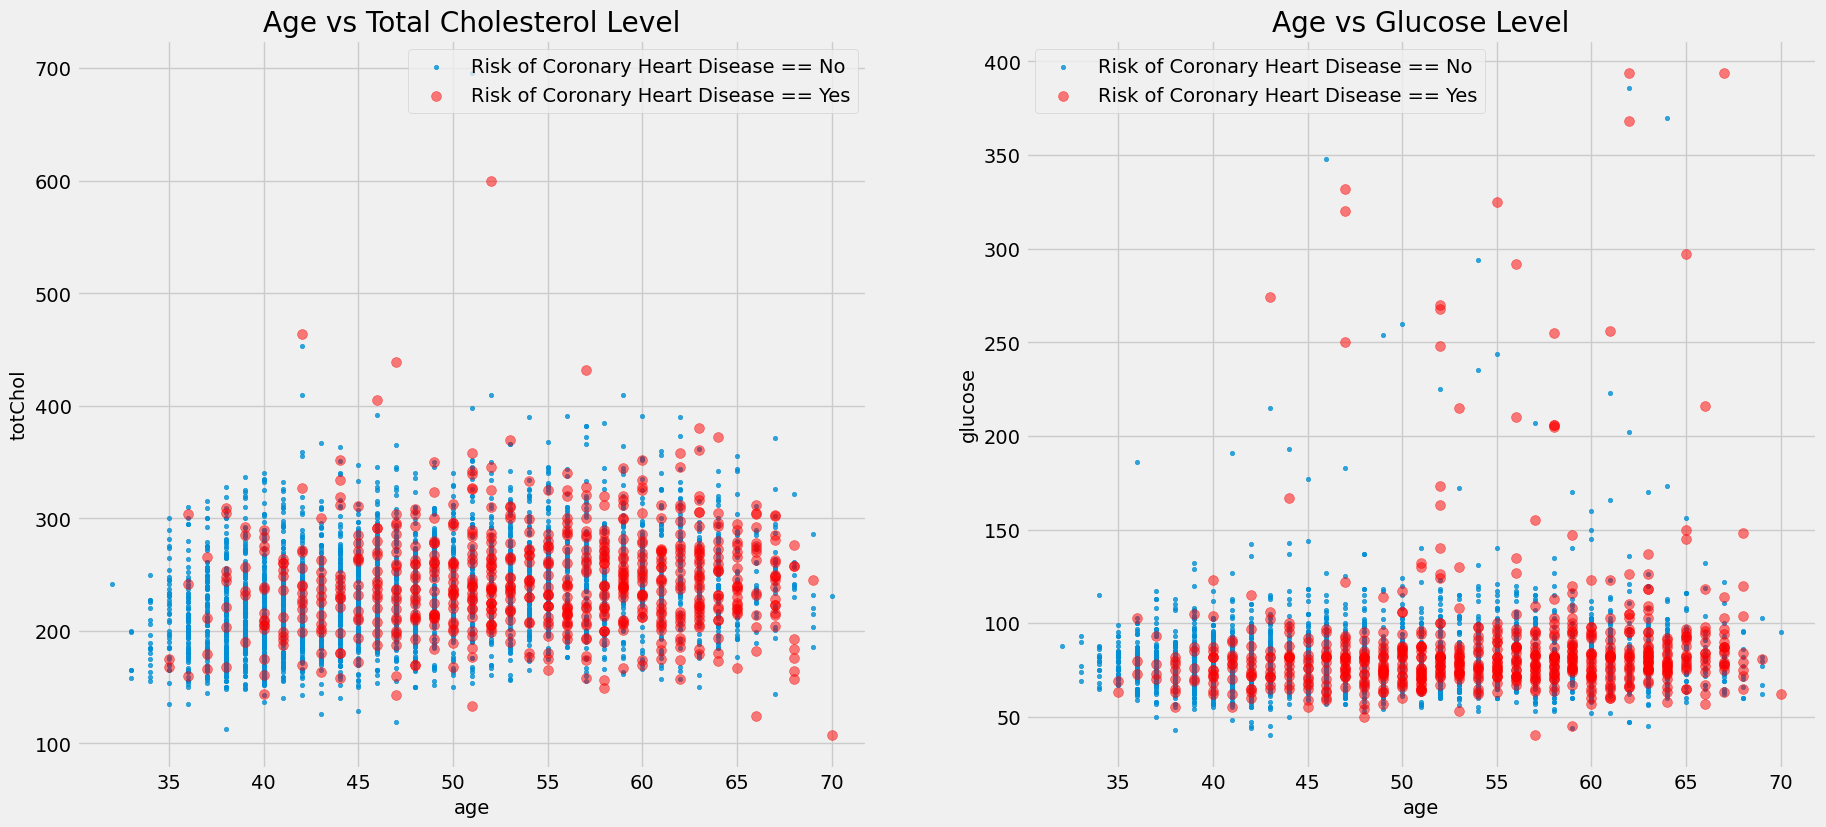

In [89]:
plt.figure(1 , figsize = (20 ,9))

plt.subplot(1 , 2 , 1)
scatter_plot(x = 'age' , y = 'totChol' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Total Cholesterol Level')

plt.subplot(1 , 2 , 2)
scatter_plot(x = 'age' , y = 'glucose' ,hue = 'TenYearCHD' , label1 = 'Risk of Coronary Heart Disease == No' , 
             label2 = 'Risk of Coronary Heart Disease == Yes' ,s1 = 10 , s2 = 50)
plt.title('Age vs Glucose Level')


plt.show()

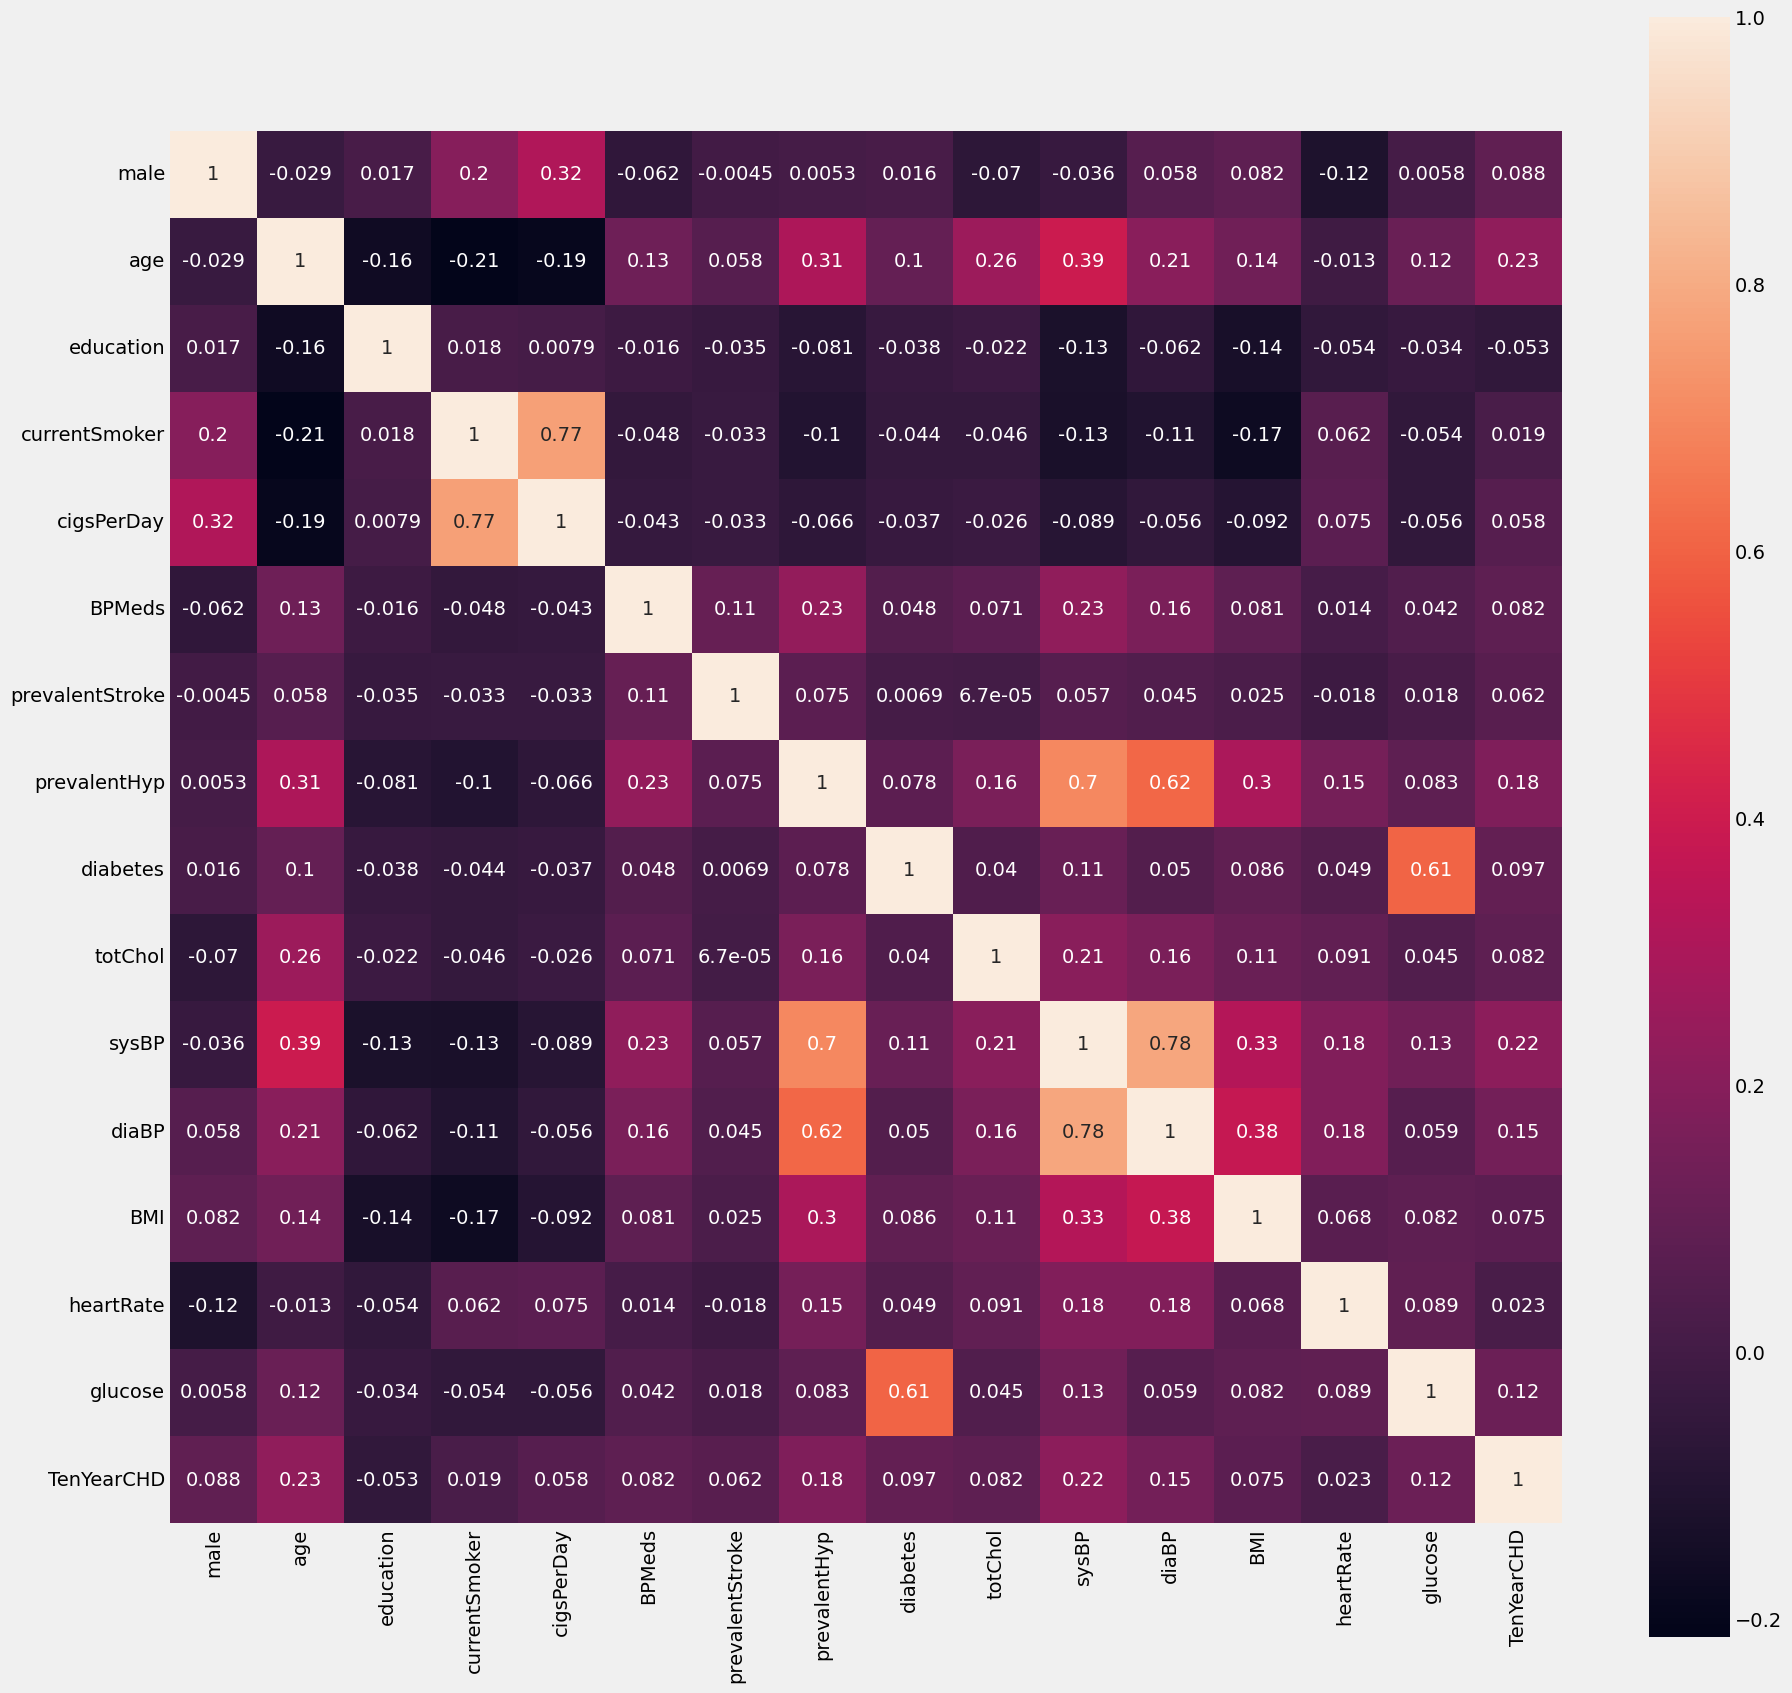

In [90]:
corrmat =  df.corr()

plt.figure(1 ,figsize = (20 , 20))
sns.heatmap(corrmat, annot = True , square  = True)
plt.show()

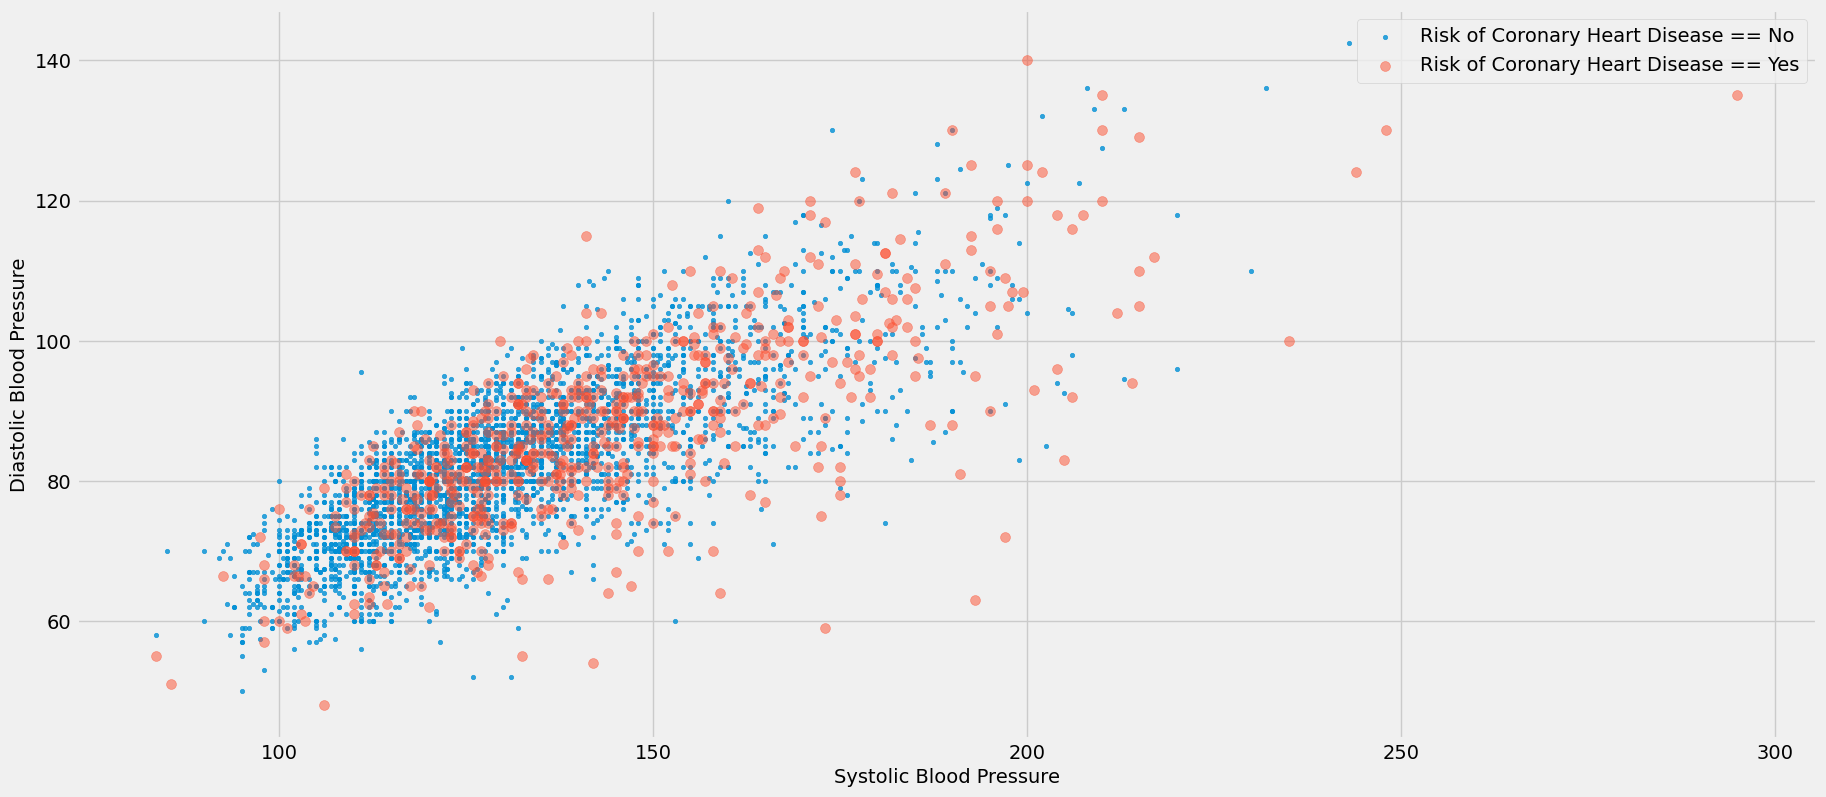

In [91]:
plt.figure(1 , figsize = (20 , 9))

plt.scatter(x = 'sysBP' , y = 'diaBP' , s = 10 , data = df[df['TenYearCHD'] == 0] , 
            label = 'Risk of Coronary Heart Disease == No' , alpha = 0.8 )
plt.scatter(x = 'sysBP' , y = 'diaBP' , s = 50 , data = df[df['TenYearCHD'] == 1] , 
            label = 'Risk of Coronary Heart Disease == Yes' , alpha = 0.5 )

plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.legend()

plt.show()

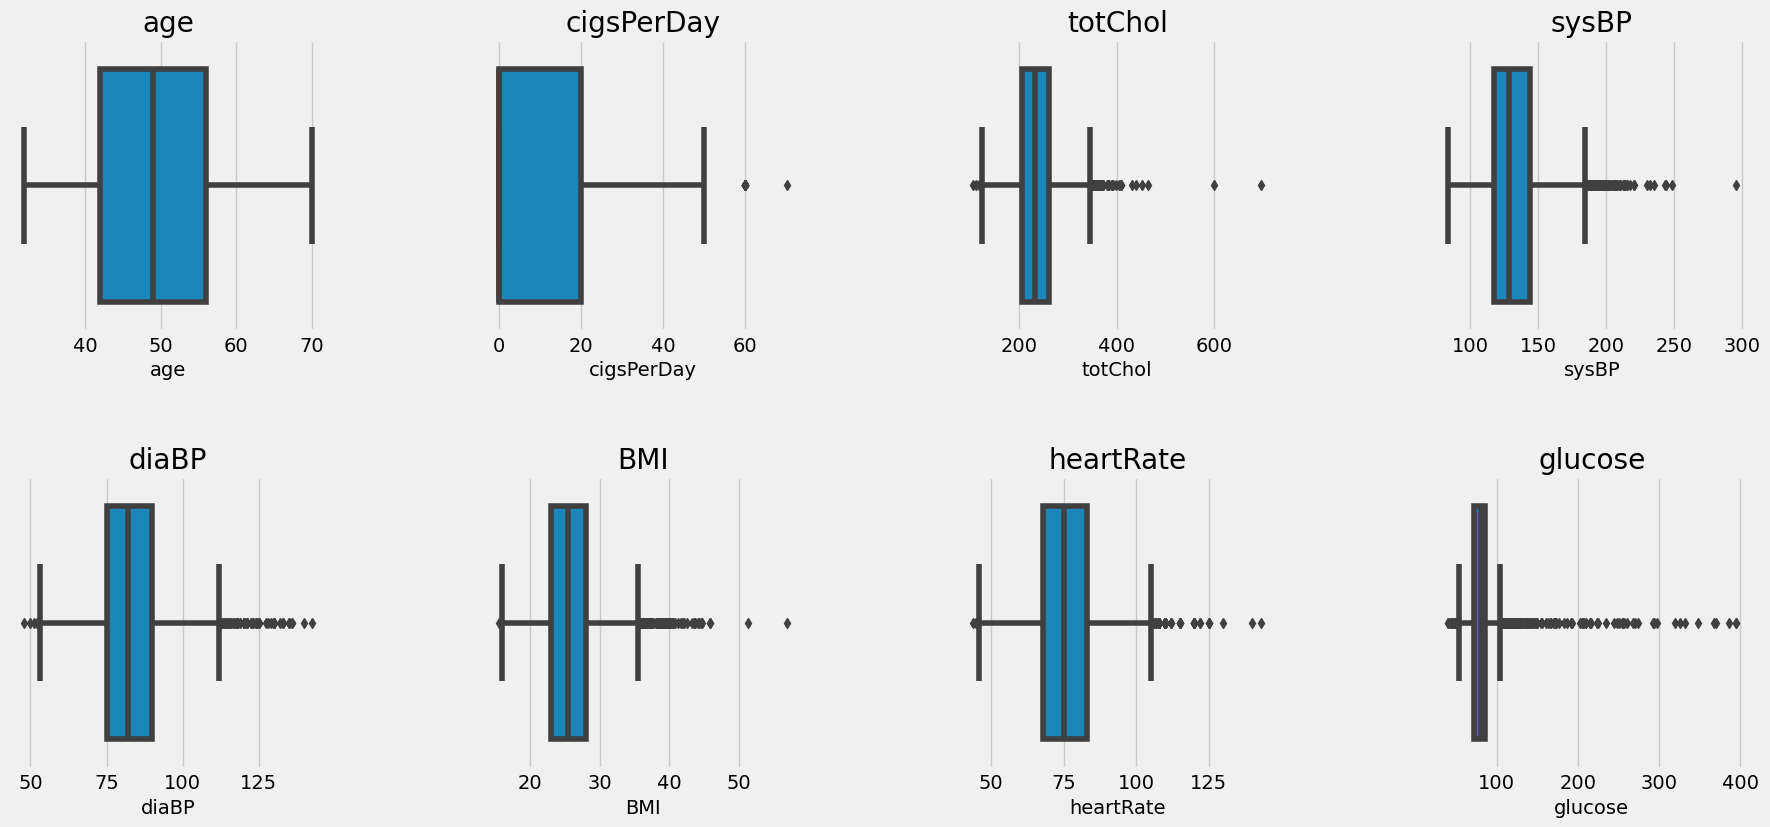

In [92]:
plt.figure(1 , figsize = (20 , 9))

n =  0
for x in contFeat:
    n += 1 
    plt.subplot(2 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x = df[x])
    plt.title('{}'.format(x))
    
plt.show()

C:\Users\Anusree\AppData\Local\Temp\ipykernel_10200\1021674033.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x][df[x] > upper_whisker] = upper_whisker
C:\Users\Anusree\AppData\Local\Temp\ipykernel_10200\1021674033.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x][df[x] > upper_whisker] = upper_whisker
C:\Users\Anusree\AppData\Local\Temp\ipykernel_10200\1021674033.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

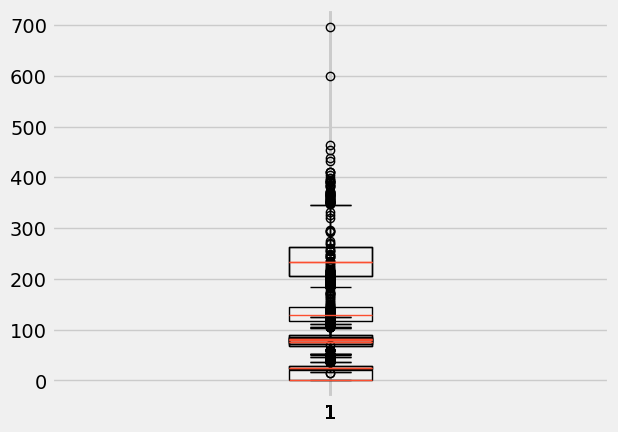

In [93]:
'''treating outliers '''
treating_feature = ['cigsPerDay' , 'totChol' , 'sysBP' , 'diaBP' , 'BMI' , 'heartRate', 'glucose']

'''
upper outliers treatment - replacing with upper whisker
'''
for x in treating_feature:
    b = plt.boxplot(df[x])
    values = [item.get_ydata()[1] for item in b['whiskers']]
    upper_whisker = values[1]
    df[x][df[x] > upper_whisker] = upper_whisker

'''
lower outliers treatment - replacing with lower whisker
'''
treating_feature_lower = [ 'totChol' , 'diaBP' , 'BMI' , 'heartRate', 'glucose']

for x in treating_feature_lower:
    b = plt.boxplot(df[x])
    values = [item.get_ydata()[1] for item in b['whiskers']]
    lower_whisker = values[0]
    df[x][df[x] < lower_whisker] = lower_whisker

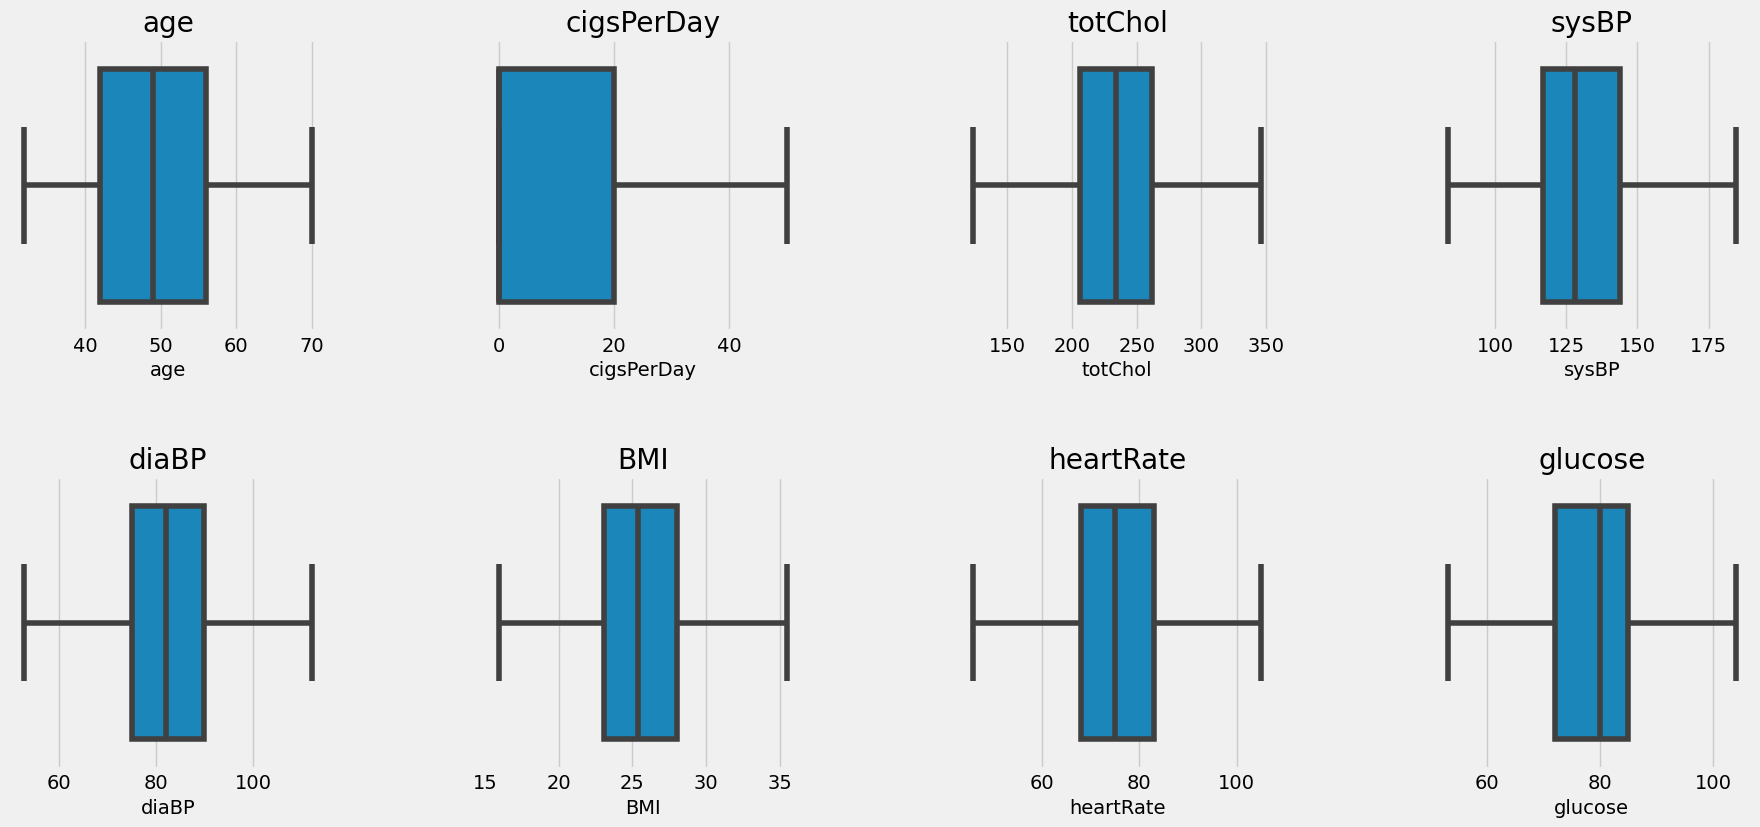

In [94]:
'''
Boxplot after outlier treatment
'''
plt.figure(1 , figsize = (20 , 9))

n =  0
for x in contFeat:
    n += 1 
    plt.subplot(2 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x = df[x])
    plt.title('{}'.format(x))
    
plt.show()

In [95]:
'''Standardizing Data'''
x = df.iloc[: , :15].values

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)

In [96]:
'''Preparing Data for train and test'''

y = df['TenYearCHD'].values

'''x0 = 1'''
x0 = np.ones([x.shape[0] , 1])

'''concatenating x0 with normalized independent variables'''
x = np.concatenate((x0 , x) , axis = 1 )



'''Train and Test Data'''
from sklearn.model_selection import train_test_split as tt
xtrain , xtest , ytrain , ytest = tt(x , y , 
                                      test_size = 0.3,
                                      random_state = 20)

In [97]:
def linearFunction(x , theta):
    z =  -(x @ theta.T)
    return z 

'''Logistic Regression'''
def LogisticRegression(x , theta):
    
    z = linearFunction(x , theta)
    e = np.power(math.e , z)
    sigmoidValues = (1 /( 1 + e ))

    return sigmoidValues


'''the sigmoid function outputs values in form probabilites (values between 0 - 1 )'''
'''classifying the probablities to class 0 and 1 '''

def classify(sigmoidValues):
    
    classified = []
    
    for probability in sigmoidValues:
        
        if probability >= 0.5:
            classified.append(1)
        else:
            classified.append(0)
        
    return classified

In [98]:
'''Cost funtion'''
def costFuntion(x , y , theta):
    
    y_pred_prob = LogisticRegression(x , theta)
    
    y = y.reshape([y.shape[0] , 1])
    
    one =  y*np.log(y_pred_prob)
    zero = (1 - y)*np.log(1 - y_pred_prob)
    
    m = len(x)
    costf = one + zero
    costf = (-1/m)*sum(costf)
    
    return costf

In [99]:
'''Gradient Descent'''
def gradientDescent(x , y , theta , alpha , iterations):
    costCaptured = np.zeros(iterations)
    y = y.reshape([y.shape[0] , 1])
    
    for i in range(iterations):
        
        y_pred_prob = LogisticRegression(x , theta)
        
        partialDerivativeoftheta =  (alpha*sum((y_pred_prob - y)*x))/len(x)
        theta = theta - partialDerivativeoftheta
        costCaptured[i] = costFuntion(x , y , theta)
    
    return theta , costCaptured   

In [100]:
'''Initiating Parameters'''

theta = np.zeros([1 , x.shape[1]])
'''alpha is the learning rate'''
alpha = 0.009
iteration = 4800

In [101]:
thetaOptimized , costCaptured = gradientDescent(xtrain , ytrain , theta , alpha , iteration)
print(thetaOptimized)

[[-1.96149106  0.27790807  0.51628439 -0.08186     0.04308341  0.18245524
   0.04653124  0.08870737  0.15910337  0.13887015  0.06651997  0.28624573
  -0.05331391  0.01971684 -0.00403007  0.02860517]]


In [102]:
costCaptured

array([0.69178454, 0.69043001, 0.68908352, ..., 0.37254442, 0.37254423,
       0.37254404])

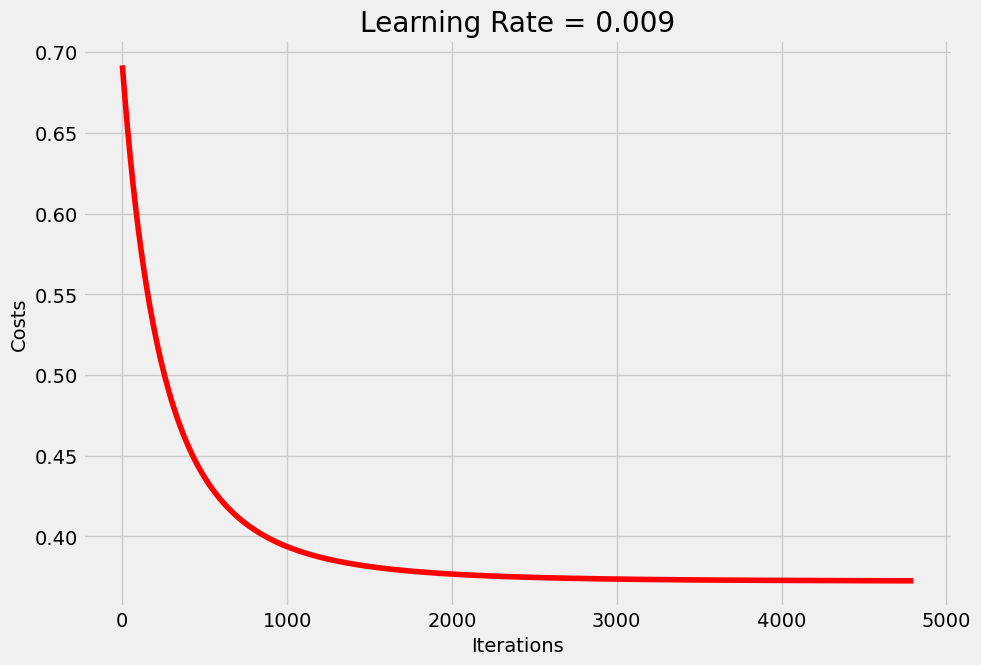

In [103]:
plt.figure(1 , figsize = (10 , 7))
plt.plot(np.arange(iteration) , costCaptured , 'r')
plt.xlabel('Iterations')
plt.ylabel('Costs')
plt.title('Learning Rate = {}'.format(alpha))
plt.show()

In [104]:
y_pred_probabilities = LogisticRegression(xtest, thetaOptimized)
y_pred_classified = classify(y_pred_probabilities)

In [105]:
from sklearn.metrics import confusion_matrix , accuracy_score

print('Confusion Matrix')
print(confusion_matrix(ytest , y_pred_classified))
print('')
print('Accuracy')
print(accuracy_score(ytest , y_pred_classified))

Confusion Matrix
[[1063   10]
 [ 187   12]]

Accuracy
0.845125786163522


In [106]:
from sklearn.metrics import accuracy_score

In [107]:
from sklearn.ensemble import RandomForestClassifier
Rclf= RandomForestClassifier()
Rclf.fit(xtrain,ytrain)

RandomForestClassifier()

In [108]:
y_pred_1 = Rclf.predict(xtest)
R = accuracy_score(ytest,y_pred_1)
print('RandomForestClassifier : ',R)

RandomForestClassifier :  0.8459119496855346


In [109]:
from sklearn.tree import DecisionTreeClassifier
Dclf = DecisionTreeClassifier()
Dclf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [110]:
y_pred_2 = Dclf.predict(xtest)

In [111]:
D = accuracy_score(ytest,y_pred_2)
print('DecisionTreeClassifier : ',R)

DecisionTreeClassifier :  0.8459119496855346


In [112]:
from sklearn.linear_model import LogisticRegression
my_log_reg = LogisticRegression(max_iter=100)

In [113]:
my_log_reg.fit(xtrain,ytrain)
my_log_reg.fit(xtrain, ytrain)
y_pred_3 = my_log_reg.predict(xtest)

In [114]:
LR = accuracy_score(ytest,y_pred_3)
print('LogisticRegression : ',LR)

LogisticRegression :  0.8459119496855346


In [115]:
from sklearn import svm
svm = svm.SVC()
svm.fit(xtrain,ytrain)

SVC()

In [116]:
y_pred_4 = svm.predict(xtest)
SVM = accuracy_score(ytest,y_pred_4)
print("SupportVectorMchine : ",SVM)

SupportVectorMchine :  0.8427672955974843


In [117]:
from sklearn.neighbors import KNeighborsClassifier
Kncf = KNeighborsClassifier(n_neighbors = 10)
Kncf.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=10)

In [118]:
y_pred_5 = Kncf.predict(xtest)
KN = accuracy_score(ytest,y_pred_5)
print("KNeighborsClassifier : ",KN)

KNeighborsClassifier :  0.8427672955974843


In [119]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [120]:
y_pred_6 = gbc.predict(xtest)
GBC = accuracy_score(ytest,y_pred_6)
print("GradientBoostingClassifier : ",GBC)

GradientBoostingClassifier :  0.8427672955974843


In [121]:
final_data = pd.DataFrame({'MODELS' :['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier',
                                     'LogisticRegression','SupportVectorMchine','KNeighborsClassifier',
                                     'GradientBoostingClassifier'],'ACCURACY':
                           [accuracy_score(ytest , y_pred_classified),R,D,LR,SVM,KN,GBC]})
print(final_data)

                       MODELS  ACCURACY
0          LogisticRegression  0.845126
1      RandomForestClassifier  0.845912
2      DecisionTreeClassifier  0.760220
3          LogisticRegression  0.845912
4         SupportVectorMchine  0.842767
5        KNeighborsClassifier  0.842767
6  GradientBoostingClassifier  0.842767


In [123]:
#sns.barplot(LR,D,SVM,GBC,KN)
#titanic = sns.load_dataset("final_data")
#sns.catplot(data=titanic, x="models", y="accuracy", palette="ch:.25")

ValueError: 'final_data' is not one of the example datasets.

In [124]:
x = df.iloc[: , :15].values
y = df['TenYearCHD'].values

In [125]:
x.shape

(4238, 15)

In [126]:
from sklearn.ensemble import RandomForestClassifier
Rclf2= RandomForestClassifier()
Rclf2.fit(x,y)

RandomForestClassifier()

In [127]:
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [128]:
New_data = pd.DataFrame({'male':1,'age':50,	'education':3.0,'currentSmoker':1,'cigsPerDay':30.0,'BPMeds':0.0,'prevalentStroke':0,
                         'prevalentHyp':1,'diabetes':1,'totChol':240.0,'sysBP':110,'diaBP':90,'BMI':25.34,'heartRate':85,'glcose':80},
                        index=[0])

In [129]:
New_data

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   50        3.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glcose  
0             1         1    240.0    110     90  25.34         85      80

In [130]:
Prediction = Rclf2.predict(New_data)
if Prediction[0]==0:
  print("Ohh!\nYou Have No Heart Disease")
else:
  print("Opps!]\nYou Have No Heart Disase")

Ohh!
You Have No Heart Disease


C:\Users\Anusree\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [131]:
import joblib

joblib.dump( Rclf2,'Rclf_model.joblib')

['Rclf_model.joblib']

In [132]:
model=joblib.load('Rclf_model.joblib')

In [133]:
model.predict(New_data)

C:\Users\Anusree\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0], dtype=int64)

In [150]:
from tkinter import * 
import joblib

In [151]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=float(e11.get())
    p12=float(e12.get())
    p13=float(e13.get())
    p14=float(e14.get())
    p15=float(e15.get())
    model = joblib.load('Rclf_model.joblib')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13,p14,p15]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


''

In [152]:
label = Label(master, text="HEART DISEASE PREDICTION SYSTEM", bg="black", fg="white"). \
 grid(row=0, columnspan=2)

Label(master, text="Gender [M:1 F:0]").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Education").grid(row=3)
Label(master, text="Smoker [Y:1 N:0]").grid(row=4)
Label(master, text="Cigarettes per day").grid(row=5)
Label(master, text="BP").grid(row=6)
Label(master, text="Prevalent Stroke [Y:1 N:0]").grid(row=7)
Label(master, text="Prevalent Hypertension [Y:1 N:0]").grid(row=8)
Label(master, text="Diabetes [Y:1 N:0]").grid(row=9)
Label(master, text="Total Cholesterol").grid(row=10)
Label(master, text="Systolic BP").grid(row=11)
Label(master, text="Diastolic BP").grid(row=12)
Label(master, text="BMI").grid(row=13)
Label(master, text="Heart Rate").grid(row=14)
Label(master, text="Glucose").grid(row=15)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)
e14.grid(row=14, column=1)
e15.grid(row=15, column=1)


#tk.Button(master, text='Quit', command=master.quit).grid(row=16, column=0, pady=4)
Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()